In [1]:
# 데이터 구조 
# 4,921 개 학습용 데이터 / 테스트 1320 개

import itertools
from time import time
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff # !pip install arff
from sklearn.preprocessing import StandardScaler, RobustScaler
import os

In [2]:
# !pip install arff
# !pip install pandas
file_path = "./dataset"
train_fn = "FordA_TRAIN.arff"
test_fn = "FordA_TEST.arff"

def read_ariff(path) : 
    raw_data , meta = arff.loadarff(path)
    cols = [x for x in meta]
    
    data2d = np.zeros([raw_data.shape[0], len(cols)])
    
    
    for index, col in zip(range(len(cols)), cols):
        data2d[:,index] = raw_data[col]
        
    return data2d


train_path = os.path.join(file_path, train_fn)
test_path = os.path.join(file_path, test_fn)
train = read_ariff(train_path)  
test = read_ariff(test_path)
print("train >> " , len(train))
print("test >>" , len(test))

train >>  3601
test >> 1320


In [3]:
x_train_temp = train[:,:-1]
y_train_temp = train[:,-1] # 마지막 컬럼이 레이블 값 

x_test = test[:,:-1]
y_test = test[:,-1]

print(x_test, y_test)

[[-0.14040239  0.17164128  0.30204415 ... -0.69040244 -0.97659635
  -0.79426313]
 [ 0.33403756  0.32225332  0.45384397 ... -1.0417721  -1.1596145
  -1.3756589 ]
 [ 0.71668608  0.74436655  0.72591291 ... -3.6752806  -4.1366217
  -4.3396117 ]
 ...
 [ 0.71008362  0.59397882  0.3818858  ... -0.12655282 -0.11782239
  -0.18909413]
 [ 0.00684706 -0.14062427 -0.27059412 ... -1.0007084  -1.0841075
  -1.109963  ]
 [-0.54135529 -0.24172258  0.10074086 ... -0.09362504 -0.90080431
  -1.778341  ]] [-1. -1. -1. ...  1.  1.  1.]


In [4]:
# 학습용 검증용 테스트용 데이터셋 나누기 
normal_x = x_train_temp[y_train_temp==1] # train_x 테이터 중 정상 데이터 
abnormal_x = x_train_temp[y_train_temp==-1] # train_x 데이터 중 비정상 데이터 

normal_y = y_train_temp[y_train_temp==1]
abnormal_y = y_train_temp[y_train_temp==-1]

# 정상 데이터 8:2
# 정상 데이터를 8:2 나누기 위한 인덱스 설정 
ind_x_normal = int(normal_x.shape[0]*0.8)
ind_y_normal = int(normal_y.shape[0]*0.8)
# 비정상 데이터 8:2
ind_x_abnoraml = int(abnormal_x.shape[0]*0.8)
ind_y_abnoraml = int(abnormal_y.shape[0]*0.8)


x_train = np.concatenate((normal_x[:ind_x_normal], abnormal_x[:ind_x_abnoraml]), axis=0) # 80
x_valid = np.concatenate((normal_x[ind_x_normal:], abnormal_x[ind_x_abnoraml:]), axis=0) # 20

y_train = np.concatenate((normal_y[:ind_y_normal], abnormal_y[:ind_y_abnoraml]), axis=0) # 80
y_valid = np.concatenate((normal_y[ind_y_normal:], abnormal_y[ind_y_abnoraml:]), axis=0)


In [5]:
# 데이터 확인 
print("x_tain" , len(x_train))
print("x_valid" , len(x_valid))
print("y_train" , len(y_train))
print("y_valid" , len(y_valid))
print("x_test", len(x_test))
print("y_test", len(y_test))


x_tain 2880
x_valid 721
y_train 2880
y_valid 721
x_test 1320
y_test 1320


[-1.  1.]
[1476, 1404] [370, 351] [681, 639]


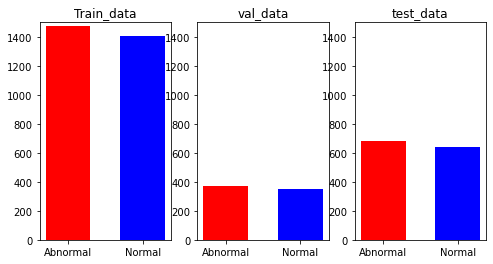

In [6]:
# 시각화 

# class 종류 정상 1 비정상 -1
classes = np.unique(np.concatenate((y_train, y_test), axis=0))
print(classes)

x = np.arange(len(classes)) # plot x 축 개수 
lables = ["Abnormal", "Normal"] # plot x 축 이름 

# train, valid , test
valuse_train = [(y_train == i ).sum() for i in classes]
valuse_valid = [(y_valid == i ).sum() for i in classes]
valuse_test = [(y_test == i ).sum() for i in classes]

print(valuse_train, valuse_valid, valuse_test)


plt.figure(figsize = (8,4))
plt.subplot(1,3,1)
plt.title("Train_data")
plt.bar(x, valuse_train, width = 0.6, color=["red" , "blue"])
plt.ylim([0, 1500])
plt.xticks(x, lables)

plt.subplot(1,3,2)
plt.title("val_data")
plt.bar(x, valuse_valid, width = 0.6, color=["red" , "blue"])
plt.ylim([0, 1500])
plt.xticks(x, lables)

plt.subplot(1,3,3)
plt.title("test_data")
plt.bar(x, valuse_test, width = 0.6, color=["red" , "blue"])
plt.ylim([0, 1500])
plt.xticks(x, lables)

plt.show()


[-1.  1.]


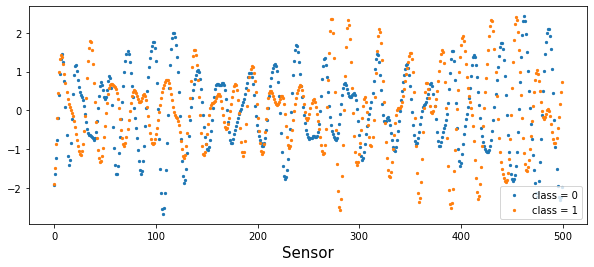

In [7]:
# 시각화 특정 시간에서의 시계열 샘플을 플롯 
import random 

# 정상 : 1 비정상 : -1
labels = np.unique(np.concatenate((y_train, y_test), axis=0))
print(labels)

plt.figure(figsize = (10,4))

for c in labels:
    C_X_train = x_train[y_train == c]
#     print(C_X_train)
    if c ==-1 : c = c + 1
    time_t = random.randint(0, C_X_train.shape[0]) # 0 ~ 1404 사이의 랜덤한 정수 특정 time t 가 됨
    plt.scatter(range(0, 500), C_X_train[time_t], label = "class = " + str(int(c)), 
                marker='o' , s=5)
    
plt.legend(loc="lower right")
plt.xlabel("Sensor", fontsize=15)
plt.xlabel("Sensor", fontsize=15)
plt.show()

비정상 Label number data :  1476
Random time number :  1293


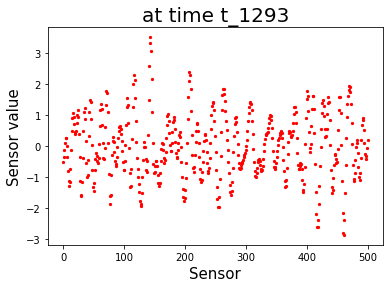

정상 Label number data :  1404
Random time number :  1197


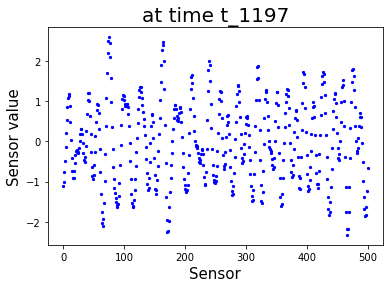

In [8]:
# 특정 시간에서의 시계열 샘플을 (정상 비정상 샘플로 각각 출력)
def get_scatter_plot(c) :
    time_t = random.randint(0, c_x_train.shape[0])
    print("Random time number : ", time_t)
    
    plt.scatter(range(0, c_x_train.shape[1]), c_x_train[time_t],
                marker='o', s=5, c="r" if c ==-1 else "b")
    plt.title(f"at time t_{time_t}", fontsize=20)
    plt.xlabel("Sensor", fontsize=15)
    plt.ylabel("Sensor value", fontsize=15)
    
    plt.show()
    

labels = np.unique(np.concatenate((y_train, y_test)), axis=0)

for c in labels :
    c_x_train = x_train[y_train == c]
    
    if c ==-1:
        print("비정상 Label number data : " , len(c_x_train))
        get_scatter_plot(c)
    else :
        print("정상 Label number data : ", len(c_x_train))
        get_scatter_plot(c)


random sensor number 425


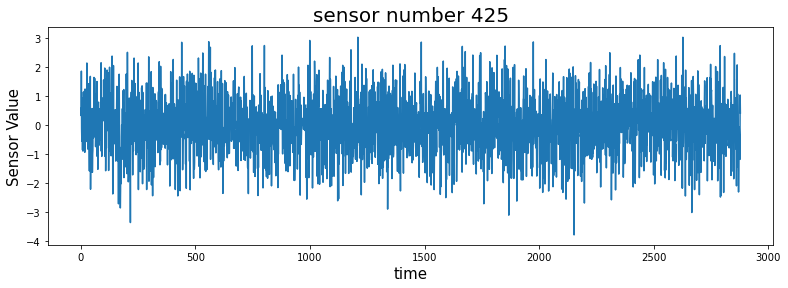

In [9]:
# 시각화 임의의 센서 값의 시계열 show
sensor_number = random.randint(0, 500)
print(f"random sensor number {sensor_number}")
plt.figure(figsize = (13,4))
plt.title(f"sensor number {sensor_number}", fontsize=20)
plt.plot(x_train[:, sensor_number])
plt.xlabel("time", fontsize=15)
plt.ylabel("Sensor Value" , fontsize=15)
plt.show()

In [10]:
# 데이터 특성 파악 
import matplotlib.cm as cm
from matplotlib.collections import EllipseCollection

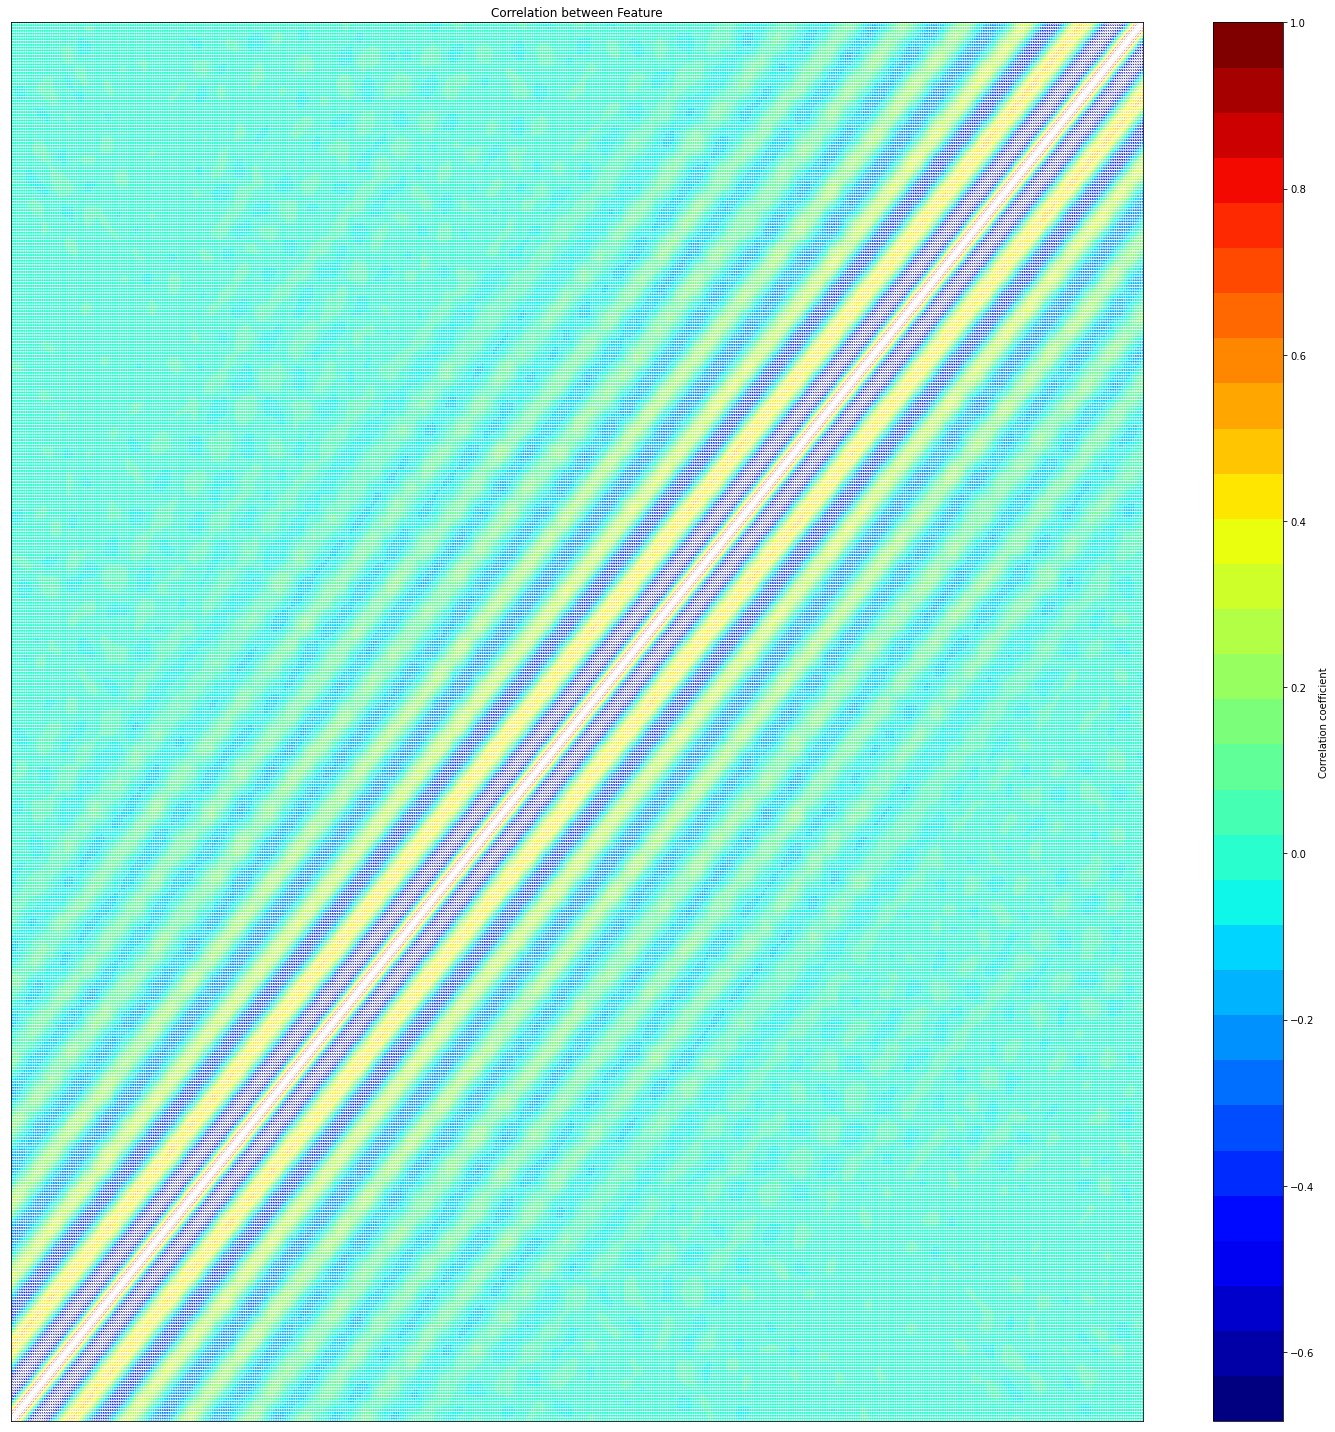

In [11]:
df = pd.DataFrame(data = x_train, columns=["sensor_{}".format(label+1) 
                                           for label in range(x_train.shape[-1])])

# print(df)
data = df.corr()
# print(data)

def plot_corr_ellipes(data, ax = None, **kwargs) :
    M = np.array(data)
    
    if not M.ndim == 2 :
        return ValueError("data must be a 2D array")
    if ax is None :
        flg , ax = plt.subplots(1,1, subplot_kw = {'aspect' : 'equal'})
        ax_set_xlim(-0.5, M.shape[1] -0.5)
        ax_set_ylim(-0.5, M.shape[0] -0.5)
        
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T
    
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()
    
    ec = EllipseCollection(widths = w, heights = h , angles = a , units = 'x', offsets=xy,
                          transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)
    
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)
        
    return ec

fig, ax = plt.subplots(1,1, figsize=(20,20))
cmap = cm.get_cmap("jet", 31)
m = plot_corr_ellipes(data, ax=ax, cmap=cmap)
cb = fig.colorbar(m)
cb.set_label("Correlation coefficient")
plt.title("Correlation between Feature")
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [13]:
"""
동일 시간 길이(3,600) 내 센서 값들이 상당히 넓은 범위로 퍼져 있을 뿐만 아니라, 변
수 간의 Scale이 서로 다르기 때문에, 데이터를 그대로 학습하는 것은 일반적으로 적
절하지 않다. 따라서 인풋 값들을 정규화(Normalization) 과정을 거치는데,
StandardScaler 또는 RobustScaler를 통해 진행한다.
흔히 공정 데이터에 이상치(Outlier)가 발생할 수 있는데 이에 강건한 정규화가 필요
할 때가 있다. 이때 RobustScaler를 사용한다. StandardScaler는 보다 더 일반적으
로 많이 사용하는 정규화 방법으로, 데이터를 단위 분산으로 조정함으로써 Outlier에
취약할 수 있는 반면, RobustScaler는 Feature 간 은 스케일을 갖게 되지만 평균과
분산 대신 중간 값(median)과 사분위값(quartile)을 사용함으로써, 극단값(Outlier)
에 영향을 받지 않는 특징이 있다.
"""

# Stander 
stder = StandardScaler()
stder.fit(x_train)
x_train = stder.transform(x_train)
x_valid = stder.transform(x_valid)
print(x_train, x_valid)

# RobustScaler
# rscaler = RobustScaler()
# rscaler.fit(x_train)
# x_train = rscaler.transform(x_train)
# x_valid = rscaler.transform(x_valid)
# print(x_train, x_valid)

[[ 0.76836725  0.61057968  0.36402948 ... -0.70719852 -0.55177596
  -0.31140529]
 [-0.50590719 -0.9611438  -1.24326791 ...  1.53939226  0.90041999
   0.20229797]
 [-0.3100555  -0.95541822 -1.48952808 ...  1.20972611  0.85261685
   0.35235299]
 ...
 [ 0.2135843   0.15793472  0.08842315 ... -2.16399088 -2.57035486
  -2.81765548]
 [ 0.30729252  0.25513749  0.11813824 ... -0.30203944 -0.02974967
   0.31788236]
 [-0.10995153 -0.12593931 -0.10034609 ... -1.38190263 -1.04760808
  -0.64710691]] [[-0.39425618 -0.68228692 -0.89072231 ... -1.88221297 -1.86154412
  -1.60473967]
 [-0.13453347 -0.19128975 -0.35433395 ... -1.83696594 -2.02269848
  -2.07256237]
 [ 1.38458848  1.30087011  1.16729611 ...  2.03375374  1.45261683
   0.7064044 ]
 ...
 [ 0.19187123 -0.06126879 -0.31832913 ... -1.92127258 -2.28711086
  -2.54651583]
 [-0.53351576 -0.31205765 -0.27726733 ... -1.38280911 -0.92953113
  -0.26408961]
 [-0.11232791 -0.30461916 -0.46448416 ...  0.55742195  0.5696546
   0.56144476]]


In [14]:
from sklearn.linear_model import LogisticRegression
clf_lr_1 = LogisticRegression(
    penalty = 'l2',
    C=1,
    fit_intercept = True,
    intercept_scaling = 1,
    random_state = 2,
    solver='lbfgs',
    max_iter = 1000,
    multi_class = 'auto',
    verbose=0
)

In [20]:
# numpy 로 직접 구현 
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=1000,fit_intercept = True, verbose=False) :
        self.lr = lr 
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.eps = 1e-10
        self.threshold = 0.5
        self.loss_history = list()
        
    def __add_intercept(self, X ): 
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    
    def __sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def __loss(self, h, y ):
        return (-y * np.log(h+self.eps) - (1-y) * np.log(1 - h + self.eps)).mean()
    
    
    # fit() 학습 데이터로 model 을 학습하는 메서드 
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
            
            
        # weights 
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            logit = np.dot(X, self.theta)
            hypothesis = self.__sigmoid(logit)
            gradint  = np.dot(X.T, (hypothesis - y)) / y.size
            self.theta -= self.lr * gradint
            
            
            if self.verbose == True and i % 10 == 0 :
                loss = self.__loss(hypothesis, y)
                print(f"epoch : {i} \t loss:{loss} \t")
                self.loss_history.append(loss)
                
        return self.loss_history
    
    
    # 학습 데이터로 학습된 모델을 바탕으로 테스트 데이터의 각 인스턴스의 정상일 확률을 도출하는 메서드 
    def predict_prob(self, X) : 
        if self.fit_intercept:
            X = self.__add_intercept(X)
            
        return self.__sigmoid(np.dot(X, self.theta))  
    
    # 학습 데이터로 학습된 모델을 바탕으로 테스트 데이터 라벨을 확인 하는 메서드 
    def prdict(self, X):
        prdict_labels = np.where(self.predict_prob(X) > self.threshold, 1,0)
        return prdict_labels
    
    
    # 모델 테스트 정확도 도출 
    def eval(self, x,y):
        res_y = np.round(self.predict_prob(x), 0)
        accuracy = np.sum(res_y==y) / len(y)
        return accuracy   

In [21]:
x_train_lr = np.concatenate((x_train, x_valid), axis=0)
y_train_lr = np.concatenate((y_train, y_valid), axis=0)

In [22]:
# sklearn 로지스틱 회귀 학습 
clf_lr_1.fit(x_train_lr, y_train_lr)

LogisticRegression(C=1, max_iter=1000, random_state=2)

In [23]:
# test 
y_pred = clf_lr_1.predict(x_test)
score = clf_lr_1.score(x_test, y_test)
print("Logisic Regression Prediction Rate : ", round(score*100 , 2), "%")

Logisic Regression Prediction Rate :  48.26 %


In [24]:
clf_lr_2 = LogisticRegression(lr=0.01, num_iter=1000, verbose=True)
history_lr = clf_lr_2.fit(x_train_lr, y_train_lr)

epoch : 0 	 loss:0.6931471803599453 	
epoch : 10 	 loss:0.6555346830771743 	
epoch : 20 	 loss:0.6237628768644404 	
epoch : 30 	 loss:0.5948901812523946 	
epoch : 40 	 loss:0.5681023833566007 	
epoch : 50 	 loss:0.5430292577694862 	
epoch : 60 	 loss:0.5194380825149855 	
epoch : 70 	 loss:0.49715900166426524 	
epoch : 80 	 loss:0.47605901827095654 	
epoch : 90 	 loss:0.45602968074735106 	
epoch : 100 	 loss:0.4369800516510987 	
epoch : 110 	 loss:0.4188322644237505 	
epoch : 120 	 loss:0.40151854170062634 	
epoch : 130 	 loss:0.3849791093747995 	
epoch : 140 	 loss:0.369160689334457 	
epoch : 150 	 loss:0.35401538073612554 	
epoch : 160 	 loss:0.33949981025331655 	
epoch : 170 	 loss:0.3255744732968613 	
epoch : 180 	 loss:0.31220321376093385 	
epoch : 190 	 loss:0.2993528061382767 	
epoch : 200 	 loss:0.28699261454858843 	
epoch : 210 	 loss:0.2750943104356322 	
epoch : 220 	 loss:0.26363163565559466 	
epoch : 230 	 loss:0.2525802011634952 	
epoch : 240 	 loss:0.2419173139868024 	
epo

In [25]:
score = clf_lr_2.eval(x_test, y_test)
print("Logisic Regression Prediction Rate : ", round(score*100 , 2), "%")

Logisic Regression Prediction Rate :  0.83 %
